RNN处理不了太长的序列，因为RNN所有历史信息都靠隐状态保存，时间一长，隐状态对很久之前的历史信息难以表现。

因此，可能序列中不是每个观察到的词元都同等重要，有些词元的影响可以忽略。如下图：显然老鼠的出现更需要我们注意，第一次出现的猫很重要，但之后一直重复出现的猫，可能就没那么重要。
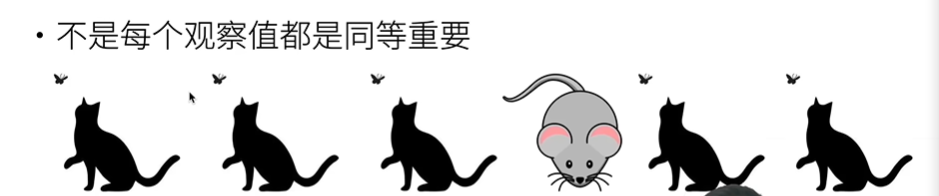

之前的RNN没有这种机制能特别关心某些地方，或者不关心某些地方，GRU通过额外的控制单元使得我们在构造隐状态可以选择注意重要的，忽略不重要的。（之后的注意力机制，更加去刻画怎样去关注某个地方）

#### GRU通过下面两个机制实现注意力
#### 更新门：把观察到的重要信息更多更新隐状态 
#### 重置门：不重要的信息不怎么更新隐状态，或忘记隐状态中的一些信息
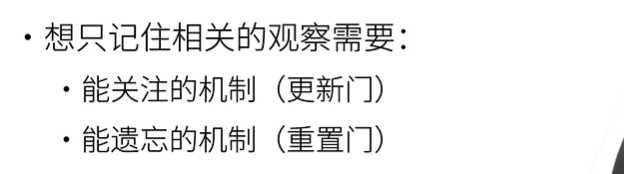

GRU需要额外计算几个向量如：Rt、Zt，并增加了模型参数
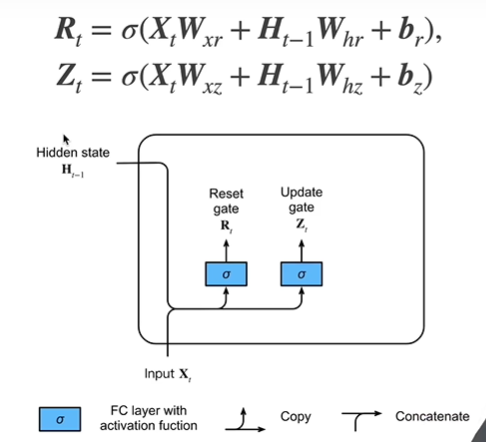

## 候选隐状态（新隐状态）
如果Rt全1，这个Ht~就是RNN计算隐状态的方式。如果Rt接近0，那么就相当于忘记上次的隐状态。如果Rt全0，那么就相当于忘记所有的状态了，变为初始状态。Rt决定了再更新新隐状态的情况下需要用的多少过去的信息
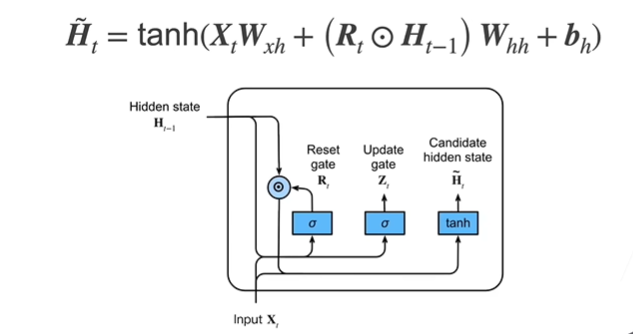
由于Rt是学出来的，所以能够分清哪些观察到的信息需要丢弃所有之前的隐状态，哪些需要更新置下一个隐状态

## 真正的隐状态
如果Zt全1，那么相当于不更新隐状态（完全不看Xt）；如过Zt全0且Rt全1，则等价回了RNN。一般情况下，会忽略当前观察的Xt的影响，或者是用一些过去的状态，加上由当前Xt更新的候选状态，来计算隐状态。
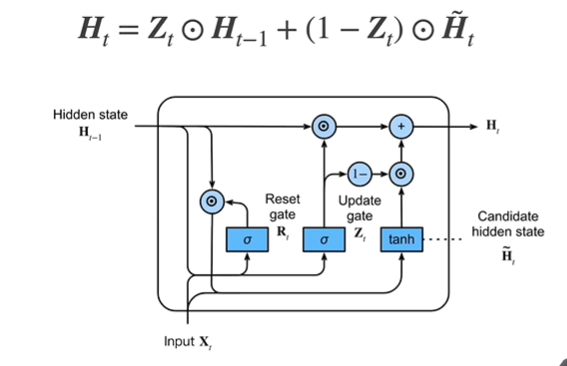

隐状态更新的极端情况：1、不看Xt（Zt全1） 2、只看Xt（Rt全0，Zt全0）

通常情况是在两种极端情况之间，调整比重

## GRU可学习的权重比RNN多了三倍
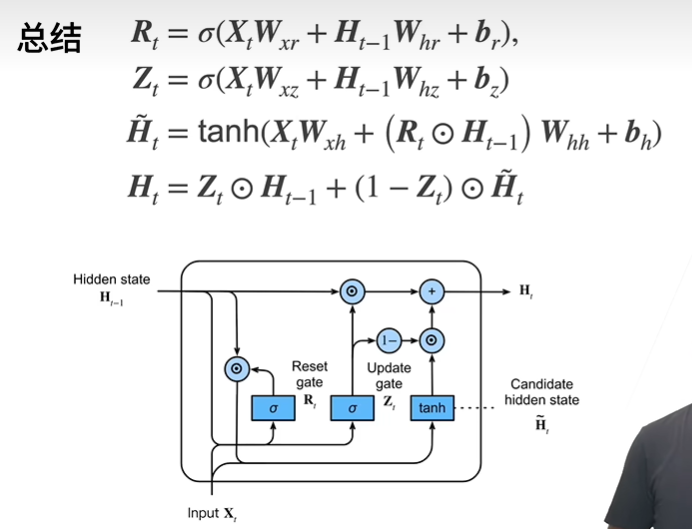